- By: Jacques Joubert
- Email: jacques@quantsportal.com
- Reference: Advances in Financial Machine Learning, Marcos Lopez De Prado, pg 40


# Data Analysis

The following data analysis is performed on a series of E-mini S&P 500 futures tick data:

1. Form tick, volume, and dollar bars
2. Count the number of bars produced by tick, volume, and dollar bars on a weekly basis. Plot a time seiries of that bar count. What bar type produces the most stable weekly count? Why?
3. Compute serieal correlation of returns for the three bar types. What bar method has the lowest serial correlation?
4. Apply the Jarque-Bera normality test on returns from the three bar types. What method achieves the lowest test statistic?
5. Standardize & Plot the Distributions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

%matplotlib inline

## Import data

In [134]:
# Read in data
dollar_bars = pd.read_csv('official_data/dollar_bars.csv', index_col=0)
volume_bars = pd.read_csv('official_data/volume_bars.csv', index_col=0)
tick_bars = pd.read_csv('official_data/tick_bars.csv', index_col=0)
time_bars = pd.read_csv('official_data/30_minES.csv', index_col=0)

# Convert index to date_time
time_bars.index = pd.to_datetime(time_bars.index)
tick_bars.index = pd.to_datetime(tick_bars.index)
volume_bars.index = pd.to_datetime(volume_bars.index)
dollar_bars.index = pd.to_datetime(dollar_bars.index)

# Subset data
time_bars = time_bars['2011-08-01':'2015-01-01']
tick_bars = tick_bars['2011-08-01':'2015-01-01']
volume_bars = volume_bars['2011-08-01':'2015-01-01']
dollar_bars = dollar_bars['2011-08-01':'2015-01-01']

# Show example
dollar_bars.head()

,open,high,low,close,cum_vol,cum_dollar,cum_ticks
date_time,,,,,,,
2011-08-01 02:55:17.443,1305.75,1309.50,1304.00,1306.50,53552,70006277.00,15422
2011-08-01 07:25:56.319,1306.75,1309.75,1304.75,1305.00,53543,70000901.00,14727
2011-08-01 08:33:10.903,1305.00,1305.00,1299.00,1300.00,53830,70094217.75,14987
2011-08-01 10:51:41.842,1300.00,1307.75,1299.00,1307.75,53734,70033006.25,14499
2011-08-01 12:10:26.542,1307.75,1308.50,1303.25,1303.50,53990,70477548.75,13854


## What bar type produces the most stable weekly count? 

In [135]:
time_count = time_bars['Close'].resample('W', label='right').count()
tick_count = tick_bars['close'].resample('W', label='right').count()
volume_count = volume_bars['close'].resample('W', label='right').count()
dollar_count = dollar_bars['close'].resample('W', label='right').count()

count_df = pd.concat([time_count, tick_count, volume_count, dollar_count], axis=1)
count_df.columns = ['time', 'tick', 'volume', 'dollar']

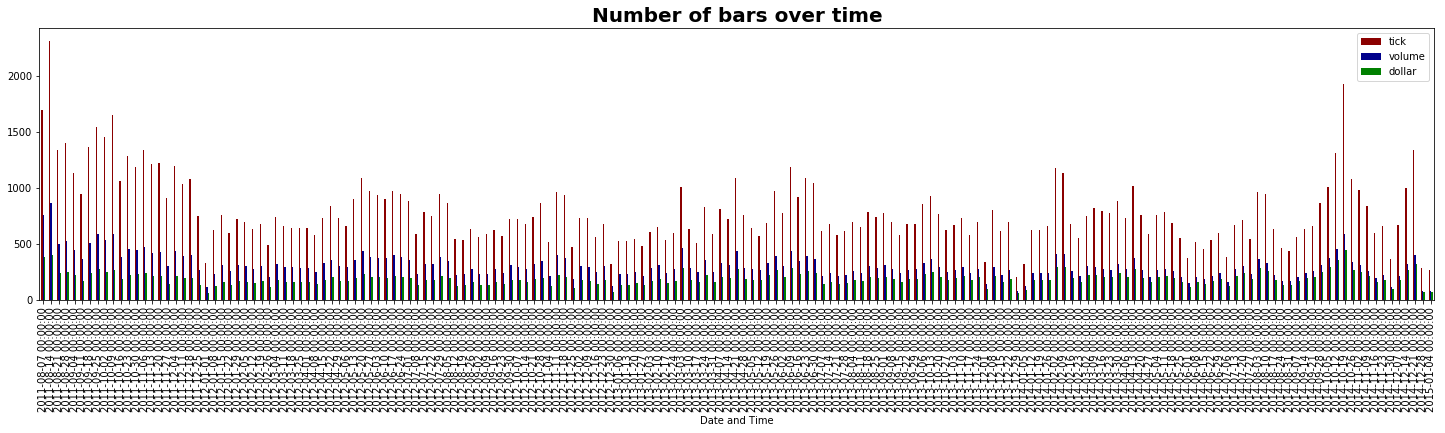

In [136]:
# Plot
count_df.loc[:, ['tick', 'volume', 'dollar']].plot(kind='bar', figsize=[25, 5], color=('darkred', 'darkblue', 'green', 'darkcyan'))
plt.title('Number of bars over time', loc='center', fontsize=20, fontweight="bold", fontname="Times New Roman")
plt.show()

From the above we can see that Tick bars vary the most over time. Follwed by volume and then dollar.

## Compute serieal correlation of returns for the four bar types. What bar method has the lowest serial correlation?

In [137]:
time_returns = np.log(time_bars['Close']).diff().dropna()
tick_returns = np.log(tick_bars['close']).diff().dropna()
volume_returns = np.log(volume_bars['close']).diff().dropna()
dollar_returns = np.log(dollar_bars['close']).diff().dropna()

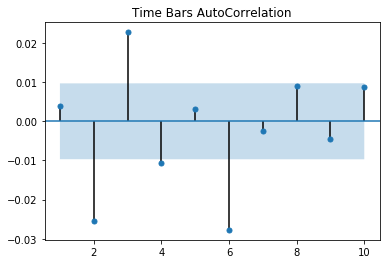

In [138]:
plot_acf(time_returns, lags=10, zero=False)
plt.title('Time Bars AutoCorrelation')
plt.show()

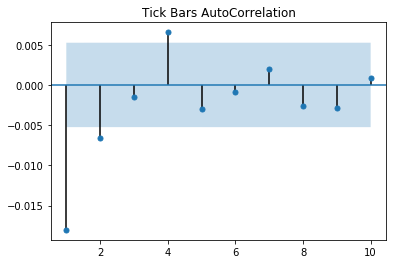

In [139]:
plot_acf(tick_returns, lags=10, zero=False)
plt.title('Tick Bars AutoCorrelation')
plt.show()

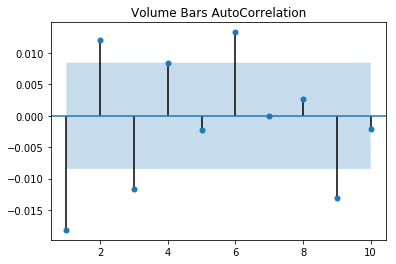

In [140]:
plot_acf(volume_returns, lags=10, zero=False)
plt.title('Volume Bars AutoCorrelation')
plt.show()

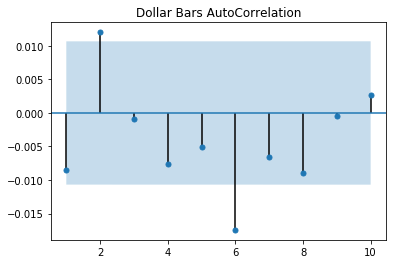

In [141]:
plot_acf(dollar_returns, lags=10, zero=False)
plt.title('Dollar Bars AutoCorrelation')
plt.show()

## Apply the Jarque-Bera normality test on returns from the three bar types. What method achieves the lowest test statistic?

In [142]:
from scipy import stats

In [143]:
print('Test Statistics:')
print('Time:', '\t', int(stats.jarque_bera(time_returns)[0]))
print('Tick:', '\t', int(stats.jarque_bera(tick_returns)[0]))
print('Volume: ', int(stats.jarque_bera(volume_returns)[0]))
print('Dollar: ', int(stats.jarque_bera(dollar_returns)[0]))

Test Statistics:
Time: 	 1782853
Tick: 	 2898186
Volume:  337591
Dollar:  143045


## Standardize & Plot the Distributions

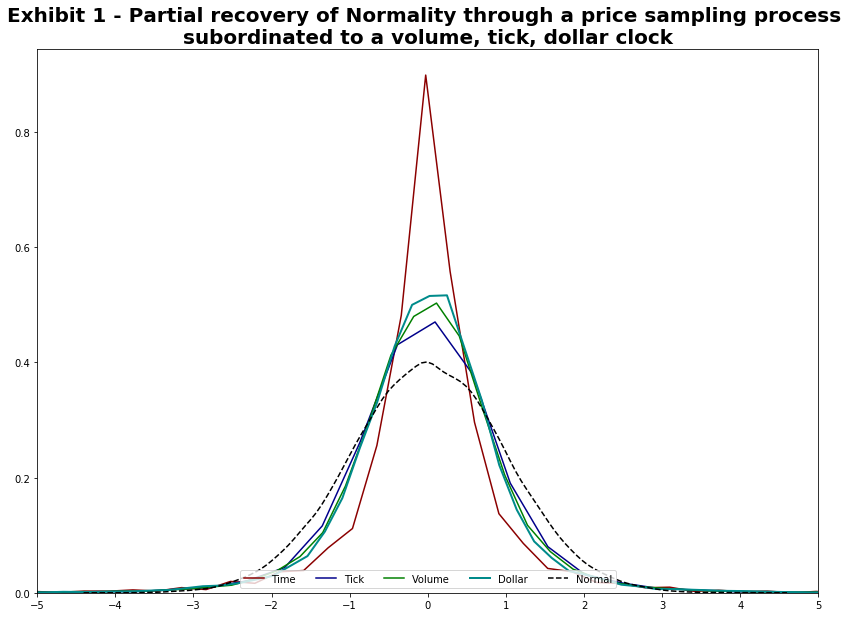

In [144]:
# Calculate the differences
time_diff = time_returns
tick_diff = tick_returns
volume_diff = volume_returns
dollar_diff = dollar_returns

# Standardize the data
time_standard = (time_diff - time_diff.mean()) / time_diff.std()
tick_standard = (tick_diff - tick_diff.mean()) / tick_diff.std()
volume_standard = (volume_diff - volume_diff.mean()) / volume_diff.std()
dollar_standard = (dollar_diff - dollar_diff.mean()) / dollar_diff.std()

# Plot the Distributions
plt.figure(figsize=(14,10))
sns.kdeplot(time_standard, label="Time", color='darkred')
sns.kdeplot(tick_standard, label="Tick", color='darkblue')
sns.kdeplot(volume_standard, label="Volume", color='green')
sns.kdeplot(dollar_standard, label="Dollar", linewidth=2, color='darkcyan')

sns.kdeplot(np.random.normal(size=len(volume_returns)), label="Normal", color='black', linestyle="--")

plt.xticks(range(-5, 6))
plt.legend(loc=8, ncol=5)
plt.title('Exhibit 1 - Partial recovery of Normality through a price sampling process \nsubordinated to a volume, tick, dollar clock',
          loc='center', fontsize=20, fontweight="bold", fontname="Times New Roman")
plt.xlim(-5, 5)
plt.show()